# Performance of original dataset

In [2]:
import openml
import pandas as pd
from openml.datasets import edit_dataset, fork_dataset, get_dataset

pd.set_option('display.max_colwidth', None)
datalist = openml.datasets.list_datasets(output_format="dataframe")
datalist["%MinorityClass"] = datalist["MinorityClassSize"]/datalist["NumberOfInstances"]
datalist = datalist[["did", "name", "NumberOfInstances","NumberOfNumericFeatures","NumberOfFeatures","MinorityClassSize", "NumberOfClasses","%MinorityClass"]]
list_did = [41159,41158,44,1479,312,1486,1485,4134,41142,847,734,1471,994]
df_data_characteristic = datalist[datalist['did'].isin(list_did)]

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import openml
import pandas as pd
import polars as pl

# Load dataset from OpenML by ID
dataset = openml.datasets.get_dataset(312)  # DID of dataset #<---- Change Here!!!
# Get the data as a DataFrame
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
# Combine data into one pandas dataframe
label = y.to_frame(name="label")
df_pd_data = pd.concat([X,label],axis=1)
# Convert from pandas dataframe to polars datframe
df_polar_data = pl.DataFrame(df_pd_data)
df_polar_data = df_polar_data.with_columns(df_polar_data["label"].to_physical().alias("label"))
# Select only non categorical feature
non_categorical_columns = [col for col, dtype in df_polar_data.schema.items() if dtype != pl.Categorical]
df_polar_data = df_polar_data.select(non_categorical_columns)

In [ ]:
# Libraries
import pandas as pd
import pycaret as pc
from pycaret.classification import *
import numpy as np

df_pd_data = df_polar_data.to_pandas()
pc_setup = setup(data = df_pd_data, target = 'label', session_id=123)
comparison = compare_models()

model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.', 'Recall', 'F1']]
# Create a DataFrame for CSV creation
df_result_candidate = model_metrics.reset_index().rename(columns={'index': 'Model'})

directory = r"..... your path ............" #<---- Change path Here!!!
filename = "christine_output.pkl" #<---- Change data name Here!!!
# Build the full file path
file_path = os.path.join(directory,filename)
with open(file_path,"rb") as file:
     loaded_obj = pickle.load(file)

# Performance of output balance dataset from Robust-CRAFG

In [ ]:
class packaged_generation:
    def __init__(self,name,percent_filter,flag,dict_data_df,df_meta,df_meta_feat,df_mi,df_centroid,running_time):
        self.data_name = name
        self.dict_data = dict_data_df
        self.portion_select_feat = percent_filter
        self.skip_select_feat = flag
        self.df_meta_data = df_meta
        self.df_meta_feature = df_meta_feat
        self.df_mi_table = df_mi 
        self.df_meta_centroid = df_centroid
        self.execution_time = running_time
    def display_info(self):
        print("Data : %s"%(self.data_name))
        print("Number of iteration : %s"%len(self.dict_data))
        print("Execution time : %s"%(self.execution_time))

In [ ]:
### load output from framework
directory = r".... your path ............" #<---- Change Path Here!!!
filename = "christine_output.pkl" #<---- Change Here!!!
# Build the full file path
file_path = os.path.join(directory,filename)
with open(file_path,"rb") as file:
     loaded_obj = pickle.load(file)

In [ ]:
import pandas as pd
import pycaret as pc
from pycaret.classification import *
import numpy as np

dict_data = loaded_obj.data

list_performance = []
for i in [1,2,3,4,5]:
    df_polar_output = dict_data[i]
    df_pd_data = df_polar_output.to_pandas()
    df_pd_temp = df_pd_data.copy()
    df_pd_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_pd_temp.fillna(0, inplace=True)
    pc_setup = setup(data = df_pd_temp,target = 'label',session_id=123)
    comparison = compare_models()
    model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
    # Create a DataFrame for CSV creation
    df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})
    list_performance.append(df_performance)
print("Successed Running")

In [4]:
class aggregate_performance:
    def __init__(self,name,ori_report,list_report):
        self.name = name
        self.original_performance = ori_report
        self.list_performance = list_report

In [ ]:
directory = ".... your path ............" #<---- Change Path Here!!!
filename = "performance_christine.csv" #<--- Change Here!!!
df_origi_performance = pd.read_csv(directory+filename)
obj_performance = aggregate_performance('christine',df_origi_performance,list_performance) #<--- Change Here!!!

# Generate comparision report for balance dataset

In [7]:
import matplotlib.pyplot as plt

def compare_performance(ori_performance,output_performance,metric):
    df_original = ori_performance[['Model',metric]]
    df_original.rename(columns={metric:'Original'},inplace=True)
    for index,df_performance in enumerate(output_performance,1):
        df_temp = df_performance[['Model',metric]]
        df_temp.rename(columns={metric:'Round_'+str(index)},inplace=True)
        df_original = pd.merge(df_original,df_temp, on='Model',how='inner')
    return df_original

def evaluate_convergence(df_compare_report,data_name):
    df_temp = df_compare_report[list(df_compare_report.columns[1:])]
    series_averages = df_temp.mean()
    fig, ax = plt.subplots()
    #df = series_averages.to_frame()
    ax.scatter(series_averages.index,series_averages.values, color='b', marker='o')
    ax.axhline(y=series_averages[0], color='r', linestyle='--',)
    # Add labels and title
    ax.set_xlabel('Each iterate of framework')
    ax.set_ylabel('Average')
    ax.set_title(data_name)
    
def count_winning_clf(df_compare_report):
    total_model = len(df_compare_report)
    df_temp_report = df_compare_report.copy()
    iterate_col = list(df_compare_report.columns[2:])
    for index,col in enumerate(iterate_col,1):
        df_temp_report['win_'+str(index)] = df_temp_report[col]>df_temp_report['Original']
    df_temp_report['any_true'] = df_temp_report[['win_1','win_2','win_3','win_4','win_5']].any(axis=1) 
    df_temp_report['max_value'] = df_temp_report[iterate_col].max(axis=1)
    df_temp_report['%Improve'] = (df_temp_report['max_value']/df_temp_report['Original'])-1
    true_count = df_temp_report['any_true'].sum()
    df_improve = df_temp_report[df_temp_report['any_true']==True]
    df_improve = df_improve[np.isfinite(df_improve['%Improve'])]
    avg_improve = df_improve['%Improve'].mean()
   # return df_improve
    return true_count/total_model,avg_improve

In [8]:
import os
import pickle
import pandas as pd
import numpy as np

##### Ratio of winning classifier and Percentage improvement classification
list_data = ['ailerons','Bioresponse','eeg_eye_state','wind','madelon','hill_valley','gina','christine','guillermo']
for data in list_data:
    directory = r".... your path ............" #<---- Change Path Here!!!
    file_name = data+"_performance_output.pkl" #<----- Change Here!!!!!
    # Build the full file path
    file_path = os.path.join(directory,file_name)
    with open(file_path,"rb") as file:
         loaded_obj_performance = pickle.load(file)
    ori_perf = loaded_obj_performance.original_performance
    output_perf = loaded_obj_performance.list_performance
    df_report_comp = compare_performance(ori_perf,output_perf,'AUC') #<----- Change Metric Here!!!!!
    percen_win_model,avg_percent_improve = count_winning_clf(df_report_comp)
    print(data,percen_win_model,avg_percent_improve)

C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original.rename(columns={metric:'Original'},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={metric:'Round_'+str(index)},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

ailerons 0.875 0.07273004846573622
Bioresponse 0.625 0.14330484237313398
eeg_eye_state 0.625 0.06445173663148476
wind 0.8125 0.005507319724196259
madelon 0.9375 0.14241284722449465
hill_valley 0.8125 0.4977320966223981
gina 0.5625 0.07355112883323077
christine 0.75 0.08271021201076875
guillermo 0.6875 0.19217730807780356


C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original.rename(columns={metric:'Original'},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={metric:'Round_'+str(index)},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original.rename(columns={metric:'Original'},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={metric:'Round_'+str(index)},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=series_averages[0], color='r', linestyle='--',)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original.rename(columns={metric:'Original'},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_48052\1070453176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

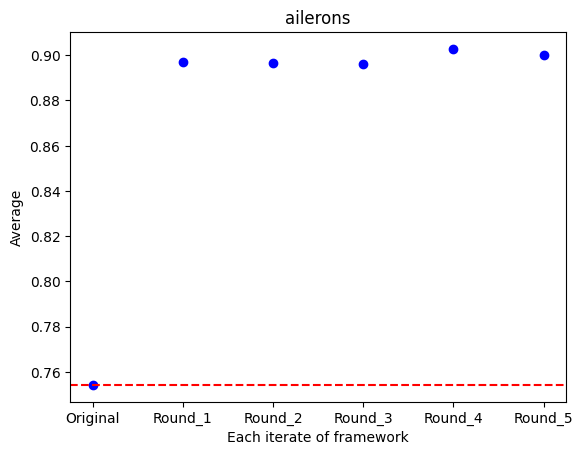

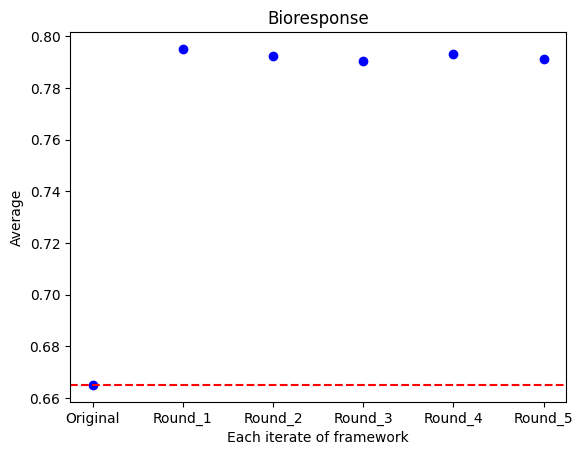

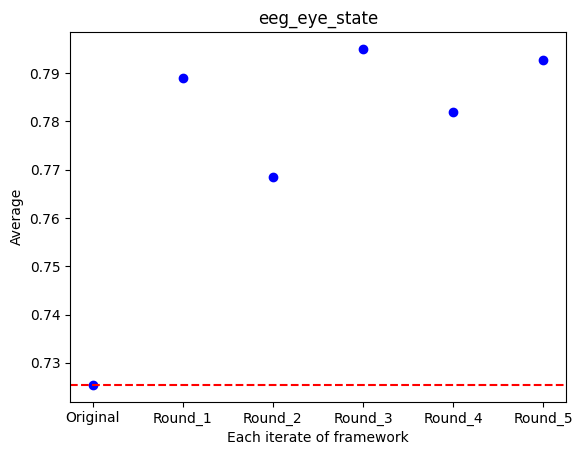

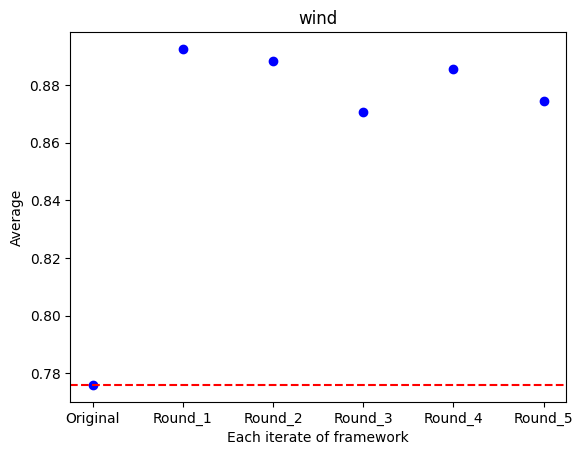

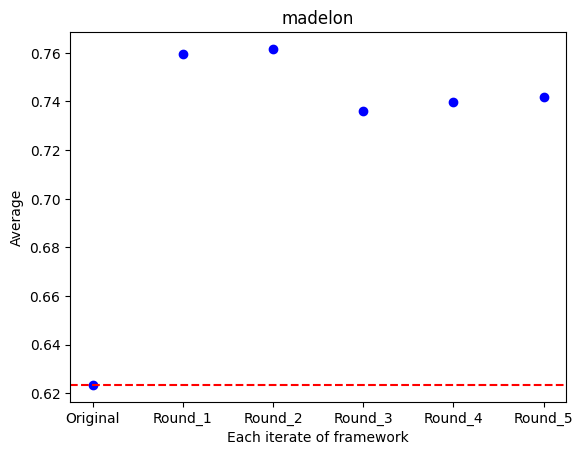

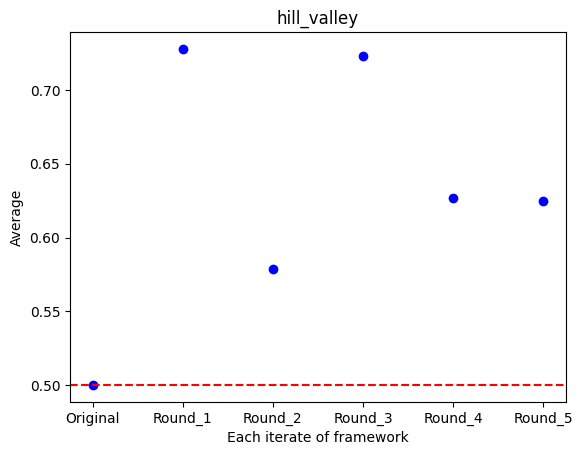

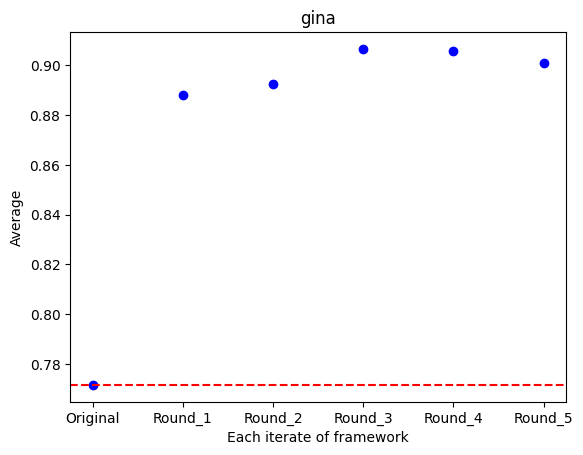

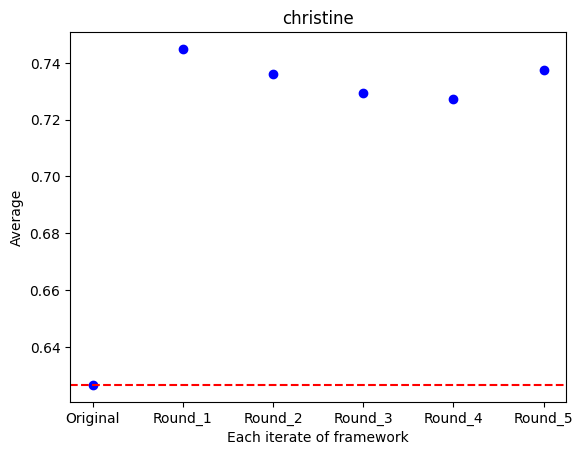

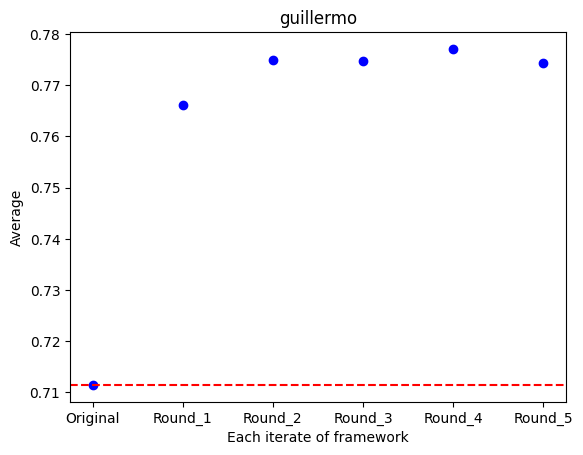

In [9]:
##### Comparion performance classification of each iterate from framework with original data
list_data = ['ailerons','Bioresponse','eeg_eye_state','wind','madelon','hill_valley','gina','christine','guillermo']
for data in list_data:
    directory = r".... your path ............" #<----- Change Here!!!!!
    file_name = data+"_performance_output.pkl" 
    # Build the full file path
    file_path = os.path.join(directory,file_name)
    with open(file_path,"rb") as file:
         loaded_obj_performance = pickle.load(file)
    ori_perf = loaded_obj_performance.original_performance
    output_perf = loaded_obj_performance.list_performance
    df_report_comp = compare_performance(ori_perf,output_perf,'AUC') #<----- Change Metric Here!!!!!
    evaluate_convergence(df_report_comp,data)

# Performance of original dataset with oversampling technique

In [ ]:
import openml
import pandas as pd
import polars as pl

# Load dataset from OpenML by ID
dataset = openml.datasets.get_dataset(41159)  # DID of dataset
# Get the data as a DataFrame
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
# Combine data into one pandas dataframe
label = y.to_frame(name="label")
df_pd_data = pd.concat([X,label],axis=1)
# Convert from pandas dataframe to polars datframe
df_polar_data = pl.DataFrame(df_pd_data)
df_polar_data = df_polar_data.with_columns(df_polar_data["label"].to_physical().alias("label"))
# Select only non categorical feature
non_categorical_columns = [col for col, dtype in df_polar_data.schema.items() if dtype != pl.Categorical]
df_polar_data = df_polar_data.select(non_categorical_columns)

In [ ]:
import pandas as pd
import pycaret as pc
from pycaret.classification import *
import numpy as np
import pickle
import os
from IPython.display import clear_output

df_pd_temp = df_polar_data.to_pandas()
pc_setup = setup(data = df_pd_temp,target = 'label',fix_imbalance=True,session_id=123) #<----- Setting Using SMOTE
comparison = compare_models()
model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
# Create a DataFrame for CSV creation
df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})

In [ ]:
# Path where you want to save
name = 'guillermo'
path = r".... Your path.....\performance_smote_%s.csv"%name
# Save DataFrame to that path
df_performance.to_csv(path,index=False)

# Performance of output imbalance dataset from Robust-CRAFG

In [ ]:
class packaged_generation_imb:
    def __init__(self,name,percent_filter,flag,dict_data_df,df_meta,df_meta_feat,df_mi,df_centroid,running_time):
        self.data_name = name
        self.dict_data = dict_data_df
        self.portion_select_feat = percent_filter
        self.skip_select_feat = flag
        self.df_meta_data = df_meta
        self.df_meta_feature = df_meta_feat
        self.df_mi_table = df_mi 
        self.df_meta_centroid = df_centroid
        self.execution_time = running_time
    def display_info(self):
        print("Data : %s"%(self.data_name))
        print("Number of iteration : %s"%len(self.dict_data))
        print("Execution time : %s"%(self.execution_time))

In [14]:
class aggregate_performance_imb:
    def __init__(self,name,ls_report_un,ls_report_sm,ls_report_bsm,ls_report_smt):
        self.name = name
        self.list_performance_un_os = ls_report_un
        self.list_performance_smote = ls_report_sm
        self.list_performance_bordersmote = ls_report_bsm
        self.list_performance_smotetomek = ls_report_smt

In [ ]:
import pandas as pd
import pycaret as pc
from pycaret.classification import *
import numpy as np
import pickle
import os
from IPython.display import clear_output

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

import gc

name_pkl = 'scene' #<------ Change here!!!!!
file_path = r"......your path.......\%s_output_imbalance.pkl"%(name_pkl) #<------ Change path here!!!!!
with open(file_path,"rb") as file:
     loaded_obj = pickle.load(file)

dict_data = loaded_obj.dict_data
################################################
list_performance_no_os = []
list_performance_smote = []
list_performance_smotetomek = []
list_performance_border_smote = []
################################################

for i in range(1,6):
    df_polar_output = dict_data[i]
    df_pd_data = df_polar_output.to_pandas()
    df_pd_temp = df_pd_data.copy()
    df_pd_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_pd_temp.fillna(0, inplace=True)
    ### 1] Run performance without oversampling
    pc_setup = setup(data = df_pd_temp,target = 'label',session_id=123)
    comparison = compare_models()
    model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
    # Create a DataFrame for CSV creation
    df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})
    list_performance_no_os.append(df_performance)
    ###########################################
    ### 2] Run performance with SMOTE
    pc_setup = setup(data = df_pd_temp,target = 'label',fix_imbalance=True,session_id=123)
    comparison = compare_models()
    model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
    # Create a DataFrame for CSV creation
    df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})
    list_performance_smote.append(df_performance)
    ##########################################
    ## 3] Run performance with SMOTETomek
    pc_setup = setup(data=df_pd_temp,target='label',fix_imbalance=True,fix_imbalance_method=SMOTETomek(),session_id=123)
    comparison = compare_models()
    model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
    # Create a DataFrame for CSV creation
    df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})
    list_performance_smotetomek.append(df_performance)
    ##########################################
    ## 4] Run performance with BorderlineSMOTE
    pc_setup = setup(data=df_pd_temp,target='label',fix_imbalance=True,fix_imbalance_method=BorderlineSMOTE(),session_id=123)
    comparison = compare_models()
    model_metrics = pc_setup.pull().loc[:, ['Accuracy','AUC','Prec.','Recall','F1']]
    # Create a DataFrame for CSV creation
    df_performance = model_metrics.reset_index().rename(columns={'index':'Model'})
    list_performance_border_smote.append(df_performance)
    ##########################################
    clear_output(wait=False)
print("Successed Running : %s"%name_pkl)

In [22]:
obj_performance_imb = aggregate_performance_imb(name_pkl,list_performance_no_os,list_performance_smote,list_performance_border_smote,list_performance_smotetomek)
# Save to a file
directory = r"....your path....." ### Change path Here!!!!
file_name = "%s_performance_imb_output.pkl"%name_pkl 
# Build the full file path
file_path = os.path.join(directory,file_name)
with open(file_path,"wb") as file:
     pickle.dump(obj_performance_imb,file)
print("Object saved successfully!")

In [16]:
name_pkl = 'spambase' ### Change Here!!!!
directory = r"....your path....." ### Change path Here!!!!
file_name = "%s_performance_imb_output.pkl"%name_pkl
file_path = directory+file_name
with open(file_path,"rb") as file:
     loaded_obj_imb = pickle.load(file)

# Generate comparision report for imbalance dataset

In [11]:
import matplotlib.pyplot as plt

def compare_imbalance_performance(name,obj_performance_imb,metric):
    dict_rename = {'un_os':'Without using oversampling','smote':'SMOTE'
                   ,'bordersmote':'Borderline SMOTE','smotetomek':'SMOTE Tomek'}
    selected_model = ['xgboost','catboost','et','lightgbm','rf','gbc'
    ,'ada','dt','lda','qda','knn','svm','nb','dummy','ridge']
    ####### Call report original #######
    directory = ".... your path ............" #<---- Change Path Here!!!
    filename = "performance_%s.csv"%name
    df_original = pd.read_csv(directory+filename)
    df_original_filter = df_original[df_original['Model'].isin(selected_model)]
    avg_original = df_original_filter[metric].mean()
    ####### Call report SMOTE #######
    directory = ".... your path ............" #<---- Change Path Here!!!
    filename = "performance_smote_%s.csv"%name
    df_smote = pd.read_csv(directory+filename)
    df_smote_filter = df_smote[df_smote['Model'].isin(selected_model)]
    avg_smote = df_smote_filter[metric].mean()
    #################################
    for attr, value in obj_performance_imb.__dict__.items():
        if attr != 'name' and len(value)== 5:
           list_performance = value
           list_avg_metric = []
           for performance in list_performance:
               filter_clf = performance[performance["Model"].isin(selected_model)]
               list_avg_metric.append(filter_clf[metric].mean())
           x = [i+1 for i in range(5)]
           plt.plot(x,list_avg_metric,label=dict_rename[attr[17:]])
    plt.xlabel("Iteration")
    plt.ylabel("Average %s"%metric)
    plt.axhline(y=avg_original, color="black", linestyle="--", label="Original without oversampling")
    plt.axhline(y=avg_smote, color="magenta", linestyle="--", label="Original SMOTE")
    plt.legend(loc="best")
    plt.title(name)
    plt.show()

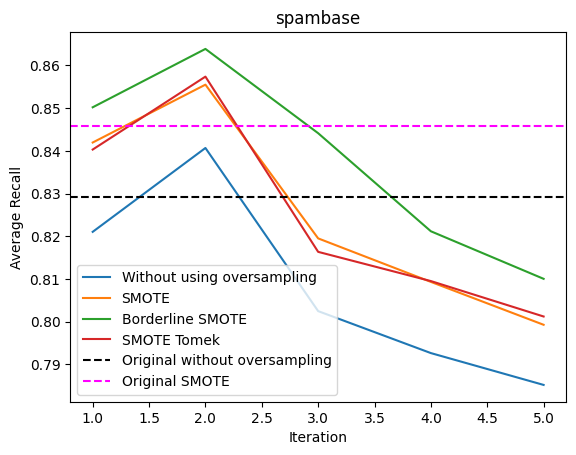

In [17]:
compare_imbalance_performance('spambase',loaded_obj_imb,'Recall') #<---- Change Name and Metric Here!!!

# Calculate improvement classification on imbalance dataset

In [20]:
def find_max_avg_metric(list_report_imb,metric):
    max_avg_metric = 0
    for iterate in range(len(list_report_imb)):
        if list_report_imb[iterate][metric].mean()>max_avg_metric:
           max_avg_metric = list_report_imb[iterate][metric].mean()
    return max_avg_metric

def improve_performance_imbalance(name,output_performance,metric):
    selected_model = ['xgboost','catboost','et','lightgbm','rf','gbc'
    ,'ada','dt','lda','qda','knn','svm','nb','dummy','ridge']
    ####### Call report original #######
    directory = ".... your path ............" #<---- Change Path Here!!!
    filename = "performance_%s.csv"%name
    df_original = pd.read_csv(directory+filename)
    df_original_filter = df_original[df_original['Model'].isin(selected_model)]
    avg_original_un_os = df_original_filter[metric].mean()
    ##################################################
    ####### Call report SMOTE #######
    directory = ".... your path ............" #<---- Change Path Here!!!
    filename = "performance_smote_%s.csv"%name
    df_smote = pd.read_csv(directory+filename)
    df_smote_filter = df_smote[df_smote['Model'].isin(selected_model)]
    avg_original_smote = df_smote_filter[metric].mean()
    #################################
    directory = ".... your path ............" #<---- Change Path Here!!!
    file_name = "%s_performance_imb_output.pkl"%name
    file_path = directory+file_name
    with open(file_path,"rb") as file:
         loaded_obj_imb = pickle.load(file)
    list_report_metric_un_os = loaded_obj_imb.list_performance_un_os
    list_report_metric_smote = loaded_obj_imb.list_performance_smote
    list_report_metric_smotetomek = loaded_obj_imb.list_performance_smotetomek
    list_report_metric_bordersmote = loaded_obj_imb.list_performance_bordersmote
    max_metric_performance = max(find_max_avg_metric(list_report_metric_un_os,metric),find_max_avg_metric(list_report_metric_smote,metric)
    ,find_max_avg_metric(list_report_metric_smotetomek,metric),find_max_avg_metric(list_report_metric_bordersmote,metric))
    ################################################## 
    Per_imp_ori_un_os = (max_metric_performance/avg_original_un_os)-1
    Per_imp_ori_smote = (max_metric_performance/avg_original_smote)-1
    print("Data : %s ,Per.Improve from Ori without OS : %s ,Per.Improve from Ori with SMOTE : %s"%(name,Per_imp_ori_un_os*100,Per_imp_ori_smote*100))
    ################################################## 

In [21]:
list_data_imb = ['ailerons','spambase','vehicle','scene','nomao','guillermo']

for data in list_data_imb:
    improve_performance_imbalance(data,loaded_obj_imb,'F1') #<---- Change metric here!!!!!!!!

Data : ailerons ,Per.Improve from Ori without OS : 4.690773585810937 ,Per.Improve from Ori with SMOTE : 14.115370535013883
Data : spambase ,Per.Improve from Ori without OS : 2.872897603844393 ,Per.Improve from Ori with SMOTE : 1.8106249389231
Data : vehicle ,Per.Improve from Ori without OS : -0.5910423554363331 ,Per.Improve from Ori with SMOTE : 6.368520976868708
Data : scene ,Per.Improve from Ori without OS : 12.74804413379098 ,Per.Improve from Ori with SMOTE : 6.318384328113735
Data : nomao ,Per.Improve from Ori without OS : 1.0656747267682176 ,Per.Improve from Ori with SMOTE : 7.7322115747377795
Data : guillermo ,Per.Improve from Ori without OS : 18.18424776700933 ,Per.Improve from Ori with SMOTE : 9.034473696109234
